In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from torchvision.datasets import CIFAR10
import os
import torch
# To read zipped .tar, .tz file
import tarfile
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
# Below library will help us to pass batch of data, as feeding all data at once will lead to OverLoading and System will get Hang
from torch.utils.data.dataloader import DataLoader
# These libraries will help us to plot images
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In computer-vision, CIFAR-10  is an established benchmark dataset used object recognition. It is a subset of 80 million tiny images. CIFAR-10 consists of $60,000$ $32\times32$ color images containing objects of one of 10 classes (with 6000 images per class). It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The classes represented in the dataset are:

* airplane 
* automobile 
* bird 
* cat 
* deer 
* dog 
* frog 
* horse 
* ship 
* truck

# Import Required Libraries and Load Data from Pytorch Dataset

Download the data from URL below

In [ ]:
url = 'https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz'
download_url(url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [ ]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path = './data')

Data is now in the `./data` folder

In [ ]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))

classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'train']
['bird', 'cat', 'dog', 'frog', 'deer', 'truck', 'airplane', 'ship', 'horse', 'automobile']


As displayed, we have 10 Classes, and 2 folders are available Train and Test

Let's read some of images and plot them

In [ ]:
airplane_file = os.listdir(data_dir + '/train/airplane')
print('Number of Training Examples: ', len(airplane_file))
print(airplane_file[:5])

Number of Training Examples:  5000
['2174.png', '4431.png', '3322.png', '0802.png', '1974.png']


In [ ]:
ship_file = os.listdir(data_dir + '/test/ship')
print('Number of Testing Examples: ', len(ship_file))
print(ship_file[:5])

Number of Testing Examples:  1000
['0802.png', '0862.png', '0465.png', '0778.png', '0576.png']


### Image Augumentation
- We have to do this job before making our model. The expectation that augmentation will prevent overfitting. This is not guaranteed and at the current stage in the class where we have not covered the topic is a dirty hack. Please treat it as such. namely - an artificial way to increase training data without relying on the unknown data generation process.

To additionally reduce the chance of overfitting, let's carry out Normalization and Regularization as below

In [ ]:
trans = transforms.Compose([
    ######## ADD YOUR CODE HERE ########
    transforms.Resize(227),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616]),
    transforms.Lambda(lambda x: torch.stack([(crop) for crop in x]))
])

Let's load train and test data

In [ ]:
train_ds = ImageFolder(data_dir+'/train', transform = trans)
val_ds = ImageFolder(data_dir+'/test', transform = trans)


# Hyperparameters

##  Add more parameters for your code.

In [ ]:
# this is one of Hyper parameter, add more parameters for your code.
batch_size = 512

In [ ]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(val_ds, batch_size*2, num_workers=3, pin_memory=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Plot and observe sets

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize = (12,12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[: 100], 10).permute(1,2,0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


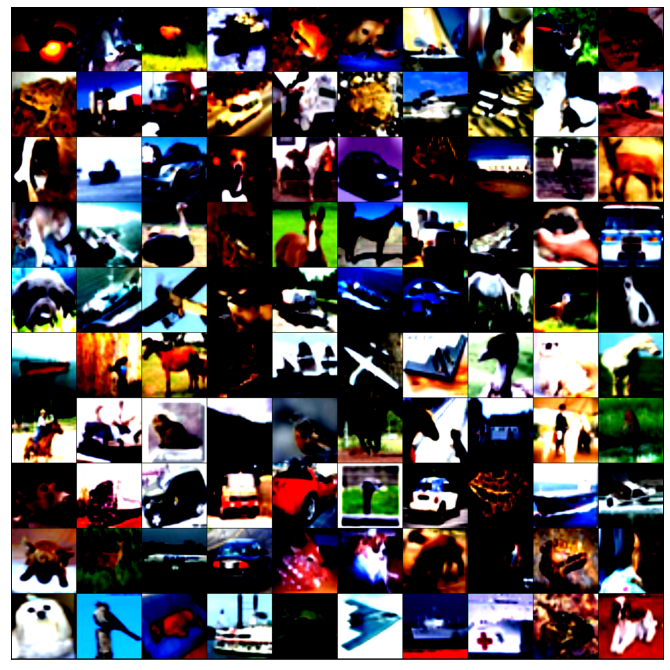

In [ ]:

show_batch(train_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


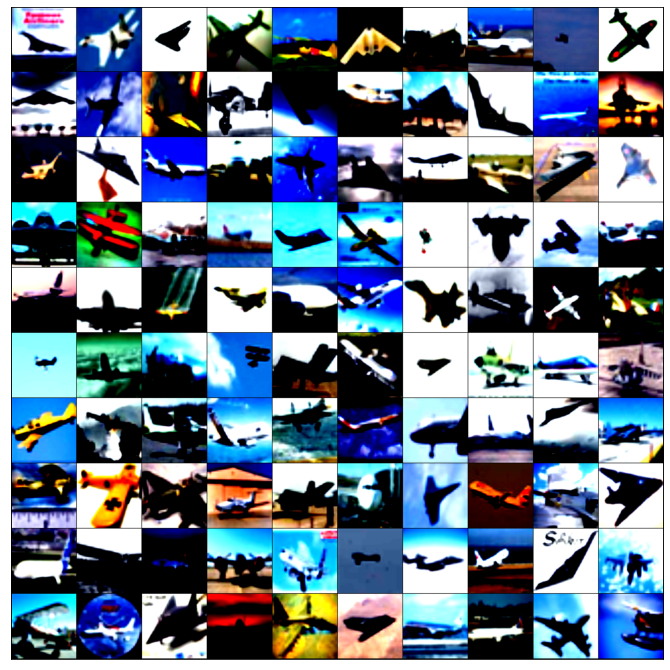

In [ ]:
show_batch(valid_dl)

We can see some changes in images from original image from dataset

In [ ]:
img, label = train_ds[0]
img.shape, label

(torch.Size([3, 227, 227]), 0)

# Model Building:
### follow the same process we did for MNIST in Colab notebooks

These libraries will help us to build Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Implement AlexNet architecture: https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [ ]:
class AlexNet(nn.Module):
    
    def __init__(self, num_classes):
        
        super().__init__()
        
        self.features = nn.Sequential(
            ######## ADD YOUR CODE HERE ########
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),  
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),  
            nn.MaxPool2d(kernel_size=3, stride=2),  
            nn.Conv2d(96, 256, 5, padding=2),  
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),  
            nn.Conv2d(256, 384, 3, padding=1),  
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, padding=1), 
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),  
            ######## END YOUR CODE HERE ########
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((6,6))
        
        self.classifier = nn.Sequential(
            ######## ADD YOUR CODE HERE ########
            
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            
            ######## END YOUR CODE HERE ########
            nn.Linear(4096, num_classes)
        )
        
        
    def forward(self, x):
        
        ######## ADD YOUR CODE HERE ########
        
        x = self.features(x)
        print(x.size)
        x = x.view(-1, 256 * 6 * 6)
        logit = self.classifier(x)
        
        ######## END YOUR CODE HERE ########
        
        return logit

In [ ]:
# lets Initialize Model
model = AlexNet(num_classes = 10)

In [ ]:
# to get all details of Model
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=True)
    (1): Linear(in_f

Let's Verify Models

In [ ]:
sample = next(iter(train_ds))
img = sample[0]
img.shape

torch.Size([3, 227, 227])

In [ ]:
out = model(img.unsqueeze(0))

<built-in method size of Tensor object at 0x7f28c74d42f0>


In [ ]:
 # Demo plot
print(train_dl)
for images, labels in train_dl:
    print('Image Shape', images.shape)
    out = model(images)
    print('output shape', out.shape)
    print('out[0]', out[0])
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Image Shape torch.Size([400, 3, 227, 227])
<built-in method size of Tensor object at 0x7f28c74ee950>
output shape torch.Size([400, 10])
out[0] tensor([ 0.0145, -0.0092, -0.0202,  0.0053, -0.0033,  0.0073, -0.0094,  0.0061,
         0.0114, -0.0066], grad_fn=<SelectBackward0>)


So, model has initial guess, it seems all options have been given same weightage i.e. 10%

In [ ]:
probs = F.softmax(out[0], dim = 0)
probs

tensor([0.1015, 0.0991, 0.0980, 0.1006, 0.0997, 0.1008, 0.0991, 0.1006, 0.1012,
        0.0994], grad_fn=<SoftmaxBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


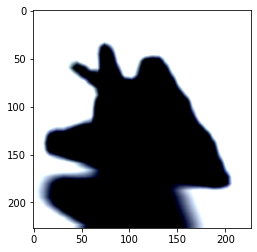

In [ ]:
plt.imshow(img.permute(1,2,0))

# Device Selection

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(valid_dl, device)
to_device(model, device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=True)
    (1): Linear(in_f

# Define Helper Functions

In [ ]:
def loss_batch(model, loss_func, x, y, opt = None, metric = None):
    metric_result = None 
    ######## ADD YOUR MODEL HERE ########
    pred = model(x)
    
    ######## ADD YOUR LOSS FUNCTION HERE ########
    loss = loss_func(pred, y)
    
    if opt is not None:
        ######## IMPLEMENT YOUR OPTIMIZATION AND BACKPROB CODE HERE ########
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    if metric is not None:
        
        metric_result = metric(pred, y)
        
    return loss.item(), len(x), metric_result

# Add your evaluation function here

1. Add loss_batch with x and y in list results
2. calcualte the average loss by using losses and nums of samples
3. calculate the average metrics by using metrics and nums of samples 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def evaluate(model, loss_fn, val_dl, metric = None):
    
    with torch.no_grad():
        
        ###### ADD YOUR CODE HERE ########
        results = [loss_batch(model, loss_fn, x, y, metric=metric) for x, y in val_dl]
        losses, nums, metrics = zip(*results)
        avg_metric = None
        
        total = np.sum(nums)
        
        ###### ADD YOUR CODE HERE ########  
        avg_loss = np.sum(np.multiply(losses, nums)) / total      
        
        if metric is not None:
            ###### ADD YOUR CODE HERE ########
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
            
    return avg_loss, total, avg_metric

We have defined Scheduler to handle Learning rate, as with SGD, we would be looking for Learning rate that changes based on Accuracy
If Model finds no change in Accuracy, it will reduce learning rate by factor of 0.1. Controling parameter would be validation accuracy.

In [ ]:
def fit(epochs, model, loss_fn, train_dl, val_dl, opt_fn = None, metric = None, scheduler = None, scheduler_on = 'val_metric'):
    
    train_losses, val_losses, val_metrics = [], [], []
    print("Metric",metric)
    
    
    for epoch in range(epochs):
        
        model.train()
        ########## ADD YOUR CODE HERE ##############
        
        valResult = evaluate(model, loss_fn, val_dl, metric)
        valLoss, total, valMetric = valResult 

        train_results = [loss_batch(model, loss_fn, x, y, metric=metric) for x, y in train_dl]
        train_loss, nums, metrics = zip(*train_results)
        
        train_losses.append(train_loss)
        val_losses.append(valLoss)
        val_metrics.append(valMetric)
        
        print("Training Loss:", train_losses[-1], "Validation Loss: ", val_losses[-1], "Training Accuracy", metrics, "Validation Acuracy", valMetric)
        
        ########## END YOUR CODE HERE ##############
        
            
    return train_losses, val_losses, val_metrics

Function to find accuracy, as there is no built in function in Pytorh to find accuracy, its simple code to define accuracy as below

In [ ]:
def accuracy(output, labels):
    _, preds = torch.max(output, dim = 1)
    
    return torch.sum(preds == labels).item() / len(preds)

Lets verify initial guess on validation

In [ ]:
######## ADD YOUR CODE HERE ########
loss_fn = F.cross_entropy
val_loss, _, val_acc = evaluate(model, loss_fn, val_dl, metric = accuracy)

print(val_loss, val_acc)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


<built-in method size of Tensor object at 0x7f0f20015f50>
2.2913315296173096 0.025


# Train Model

In [ ]:
######## ADD YOUR CODE HERE ########
num_epochs = 5

######## ADD YOUR CODE HERE ########
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.1, mode = 'max', verbose = True)


In [ ]:
history = fit(num_epochs, model, loss_fn, train_dl, val_dl, optimizer, accuracy, scheduler, 'val_metric')

Metric <function accuracy at 0x7f28c7559c20>


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


<built-in method size of Tensor object at 0x7f28c25e1050>
<built-in method size of Tensor object at 0x7f28c26671d0>
Training Loss: (2.289984941482544,) Validation Loss:  2.2903101444244385 Training M (0.625,)
<built-in method size of Tensor object at 0x7f28c263cdd0>
<built-in method size of Tensor object at 0x7f28c2667c50>
Training Loss: (2.290212631225586,) Validation Loss:  2.2899160385131836 Training M (0.625,)
<built-in method size of Tensor object at 0x7f28c2667d10>
<built-in method size of Tensor object at 0x7f28c2667a70>
Training Loss: (2.29006290435791,) Validation Loss:  2.290175199508667 Training M (0.645,)
<built-in method size of Tensor object at 0x7f28c2667530>
<built-in method size of Tensor object at 0x7f28c2667950>
Training Loss: (2.2901673316955566,) Validation Loss:  2.2900097370147705 Training M (0.62,)
<built-in method size of Tensor object at 0x7f28c2667d10>
<built-in method size of Tensor object at 0x7f28c25e1230>
Training Loss: (2.290008544921875,) Validation Los

Accuracy of AlexNet model on validation set is: 

# BONUS: PRE-TRAINING USING ResNet

use the following code: `from torchvision import datasets, models, transforms`

TASK:
1. Finetune the model using ResNet
2. Load the pretrained model and reset a final fully connected layer
3. Train and evaluate

It should take around 15-25 min on CPU. On GPU though, it takes less than a minute.

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './data/cifar10'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  
            else:
                model.eval()  

            running_loss = 0.0
            running_corrects = 0

            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                
                optimizer.zero_grad()

                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

               
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 0/9
----------
train Loss: 1.4368 Acc: 0.5279
test Loss: 0.5889 Acc: 0.8226

Epoch 1/9
----------
train Loss: 1.0761 Acc: 0.6474
test Loss: 0.3609 Acc: 0.8825

Epoch 2/9
----------
train Loss: 0.9318 Acc: 0.6867
test Loss: 0.3386 Acc: 0.8858

Epoch 3/9
----------
train Loss: 0.8554 Acc: 0.7143
test Loss: 0.3331 Acc: 0.8923

Epoch 4/9
----------
train Loss: 0.7840 Acc: 0.7366
test Loss: 0.2841 Acc: 0.9078

Epoch 5/9
----------
train Loss: 0.7456 Acc: 0.7483
test Loss: 0.3176 Acc: 0.8973

Epoch 6/9
----------
train Loss: 0.7010 Acc: 0.7635
test Loss: 0.2642 Acc: 0.9125

Epoch 7/9
----------
train Loss: 0.5707 Acc: 0.8052
test Loss: 0.2050 Acc: 0.9312

Epoch 8/9
----------
train Loss: 0.5297 Acc: 0.8195
test Loss: 0.1906 Acc: 0.9365

Epoch 9/9
----------
train Loss: 0.5088 Acc: 0.8274
test Loss: 0.1849 Acc: 0.9401

Training complete in 134m 46s
Best val Acc: 0.000000


# Plotting result

Plotting Train Losses

Text(0.5, 1.0, 'Plot between Training Loss vs Epochs')

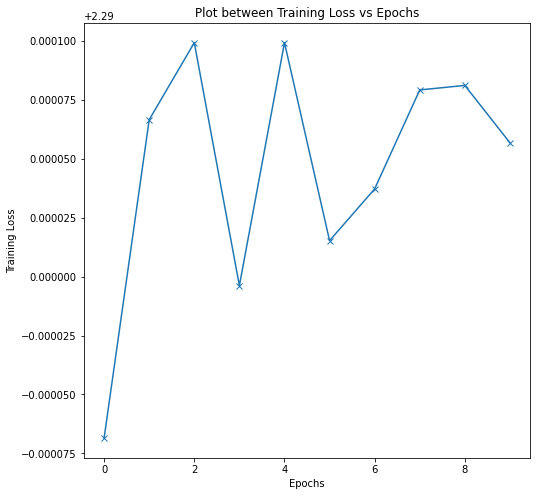

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(history[0], '-x')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Plot between Training Loss vs Epochs')

Text(0.5, 1.0, 'Plot between Validation Loss vs Epochs')

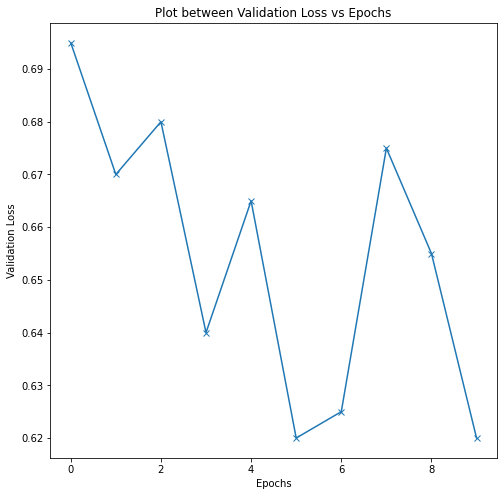

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(history[2], '-x')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Plot between Validation Loss vs Epochs')